In [1]:
 """
Este programa muestra el uso de graficas con la construccion de un mapa logístico
Ref:  https://es.wikipedia.org/wiki/Aplicaci%C3%B3n_log%C3%ADstica
Autores: Curso metodos computacionales
"""

import numpy as np
import matplotlib.pylab as plt

from IPython.display import clear_output
from time import sleep
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

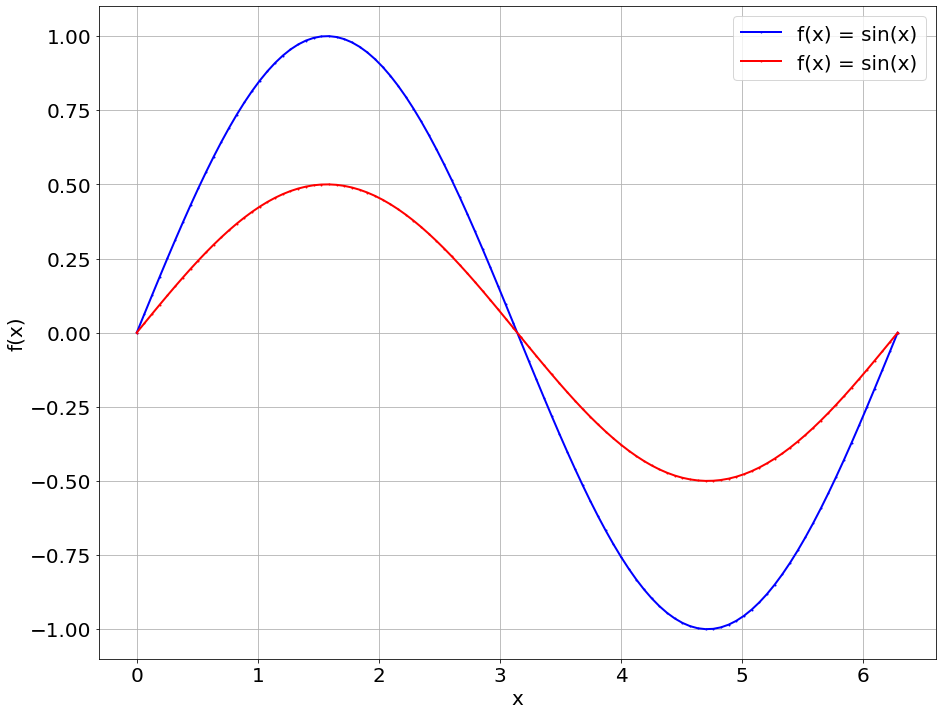

In [2]:
x = np.linspace(0, 2*np.pi, 100) 
y = np.sin(x)
plt.figure(figsize=(15, 12))
plt.plot(x, y, "b.-", markersize = 2.0, linewidth = 2.0, label="f(x) = sin(x)")
plt.plot(x, y/2, "r.-", markersize = 2.0, linewidth = 2.0, label="f(x) = sin(x)")
plt.xlabel("x", fontsize=20)
plt.ylabel("f(x)", fontsize=20)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [3]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [4]:
def f(x, r):
  x = r * x * (1 - x)  #xn+1*r*(1-x)
  return x


def logist_map0(r, xi, N):
  _x = np.zeros(N)
  
  for i in range(0, N):
    xn = f(xi, r)
    xi = xn
    _x[i] = xn
  
  return _x


def logist_map(r, xi, N):
  _x = np.zeros(N)
  
  for i in range(0, N):
    xn = f(xi, r)
    xi = xn
   #_x[i] = xn
  
  return xn


# Ver el mapeo de henon

In [5]:
f(0.2, 3)

0.4800000000000001

Texto tomado de wikipedia

- Si $0 < r \leq 1 $ la población terminará desapareciendo independientemente del valor de la población inicial.

- Si $1 < r \leq 2 $ la población rápidamente tenderá al valor: $\frac {r-1}{r}$, independientemente del valor de la población inicial.

- Si $2 < r \leq 3 $ a la larga la población también se estabilizará en: $\frac {r-1}{r}$ pero previamente fluctuará en el entorno de ese valor. La tasa de convergencia es lineal, excepto para r = 3, en que es muy lenta, menor que la lineal.

- Si $2 < r \leq    1+\sqrt {6} $ (casi 3.45), en casi todos los casos la población oscila siempre entre condiciones iniciales de la población se aproximará a oscilaciones permanentes entre los cuatro valores.

- Con r entre 3.45 y 3.54 (aproximadamente), la población tendrá oscilaciones permanentes aproximándose a 4 valores.

- Si r es ligeramente mayor de 3.54, la población oscilará entre 8 valores (16, luego 32, etc). La relación entre la longitud de los dos intervalos sucesivos de las bifurcaciones se aproxima a la constante de Feigenbaum δ = 4.669. Este comportamiento es un ejemplo de un período doble de bifurcación.


- Cerca de 3.57 es el inicio del caos, pero todavía hay ciertos rangos aislados de r que muestran un comportamiento no caótico, estas son a veces llamadas islas de estabilidad. Por ejemplo, a partir de $ 1+\sqrt {8}$ (aproximadamente 3.83) existe una serie de parámetros r que muestran oscilación entre los tres valores, y para valores ligeramente más altos de r oscilación entre 6 valores, luego 12, etc.

- Además si r = 4, los valores dejan el intervalo [0,1] y divergen para casi todos los valores iniciales.

In [6]:
r = np.array([0.2, 0.5,  2.8, 3.3, 3.48, 3.55, 3.57, 4])
#r_e = (r - 1) / r
N = 100
x_i = np.zeros((len(r), N))

for i in range(0, len(r)): 
  x_i[i] = logist_map0(r = r[i], xi = 0.5, N = 100)




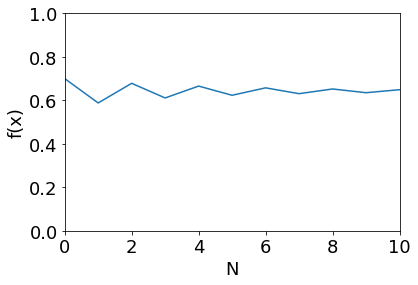

In [7]:

plt.figure()
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.ylabel("f(x)", fontsize = 18)
plt.xlabel("N", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.plot(x_i[2])


In [8]:
Nr = 100000
r  = np.linspace(2.5, 4, Nr)

#rr = ( r - 1 ) /r
xini = 0.5
xf = np.zeros(Nr)
xini = 0.5382

ranint = np.random.randint(100, 200)

for i in range(0, Nr): 
  xini = np.random.random()
  x_i = logist_map(r = r[i], xi = xini, N = 1000)

  #xf[i] = x_i[-1]
  xf[i] = x_i
  

No handles with labels found to put in legend.


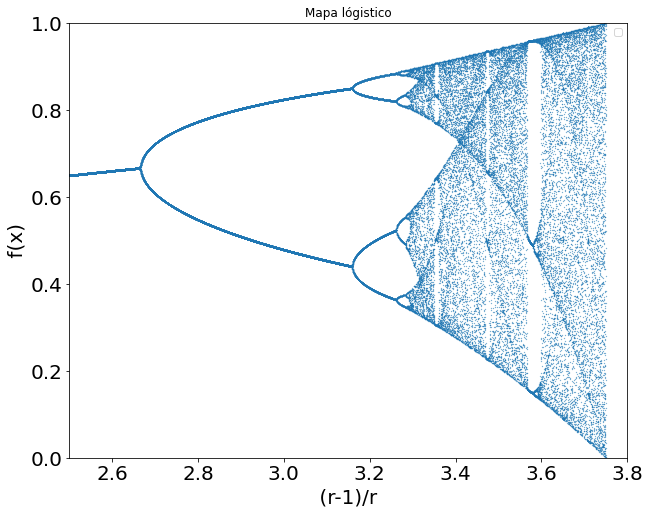

In [9]:
plt.figure(figsize = (10, 8))
plt.plot((r-1/r), xf,  ".", markersize = 0.5)
plt.ylabel(" f(x) ", fontsize=20)
plt.xlabel(" (r-1)/r ", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(2.5, 3.8)
plt.ylim(0, 1)
plt.title("Mapa lógistico")
plt.legend()
plt.show()